In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dataset/movies.csv')
df = df.dropna(subset=['genre'])
df.head()
df.shape

(3722, 20)

# Check doc embeddings

### Add embeddings to df

In [3]:
from pathlib import Path
import numpy as np

def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >= 2:
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [4]:
mean_filenames, embeddings_mean = read_embeddings('../dataset/embeddings_mean.txt')
max_filenames, embeddings_max = read_embeddings('../dataset/embeddings_max.txt')
min_filenames, embeddings_min = read_embeddings('../dataset/embeddings_min.txt')

bert_mean_filenames, bert_mean = read_embeddings('../dataset/embeddings_bert_mean.txt')
bert_max_filenames, bert_max = read_embeddings('../dataset/embeddings_bert_max.txt')
bert_min_filenames, bert_min = read_embeddings('../dataset/embeddings_bert_min.txt')

bert_headtail_filenames, bert_headtail = read_embeddings('../dataset/embeddings_bert_headtail.txt')

In [5]:
bert_headtail[bert_headtail.shape == (0,)] = np.zeros((768,))

In [6]:
df = df[df['filename'].isin(mean_filenames)].copy()

In [7]:
mean_embeddings = []
max_embeddings = []
min_embeddings = []

mean_bert = []
max_bert = []
min_bert = []
ht_bert = []
for index, row in df.iterrows():
    mean_embeddings.append(embeddings_mean[np.where(mean_filenames == row.filename)].ravel())
    max_embeddings.append(embeddings_max[np.where(max_filenames == row.filename)].ravel())
    min_embeddings.append(embeddings_min[np.where(min_filenames == row.filename)].ravel())
    
    mean_bert.append((bert_mean[np.where(bert_mean_filenames == row.filename)].ravel()))
    max_bert.append((bert_max[np.where(bert_max_filenames == row.filename)].ravel()))
    min_bert.append((bert_min[np.where(bert_min_filenames == row.filename)].ravel()))
    
    ht_bert.append((bert_headtail[np.where(bert_headtail_filenames == row.filename)].ravel()))
    
df['fasttext_mean'] = mean_embeddings
df['fasttext_max'] = max_embeddings
df['fasttext_min'] = min_embeddings

df['bert_mean'] = mean_bert
df['bert_max'] = max_bert
df['bert_min'] = min_bert


mean_embeddings = np.asarray(mean_embeddings)
max_embeddings = np.asarray(max_embeddings)
min_embeddings = np.asarray(min_embeddings)

mean_bert = np.asarray(mean_bert)
max_bert = np.asarray(max_bert)
min_bert = np.asarray(min_bert)

ht_bert = np.asarray(ht_bert)

del embeddings_mean, embeddings_max, embeddings_min, bert_mean, bert_max, bert_min, bert_headtail

In [8]:
set(map(lambda x: x.shape, ht_bert))

{(768,)}

# Check distances matrices of embedding types

In [39]:
from scipy.spatial import distance_matrix

In [ ]:
dm_mean = distance_matrix(mean_embeddings, mean_embeddings)
dm_mean.min(), dm_mean.max(), dm_mean.mean(), dm_mean.std()

In [ ]:
dm_max = distance_matrix(max_embeddings, max_embeddings)
dm_max.min(), dm_max.max(), dm_max.mean(), dm_max.std()

In [ ]:
dm_min = distance_matrix(min_embeddings, min_embeddings)
dm_min.min(), dm_min.max(), dm_min.mean(), dm_min.std()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

tfidf = TfidfVectorizer(max_features=5000, stop_words=get_stop_words('de'))

X_tfidf = tfidf.fit_transform(df.text)

# Dimensionality reduction with PCA

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)

Xr_tfidf = pca.fit_transform(X_tfidf.todense())

In [42]:
pca = PCA(n_components=2)

Xr_mean = pca.fit_transform(mean_embeddings)

In [43]:
pca = PCA(n_components=2)

Xr_max = pca.fit_transform(max_embeddings)

In [44]:
pca = PCA(n_components=2)

Xr_min = pca.fit_transform(min_embeddings)

In [45]:
pca = PCA(n_components=2)

Xr_bmean = pca.fit_transform(mean_bert)

In [46]:
pca = PCA(n_components=2)

Xr_bmax = pca.fit_transform(max_bert)

In [47]:
pca = PCA(n_components=2)

Xr_bmin = pca.fit_transform(min_bert)

In [48]:
pca = PCA(n_components=2)

Xr_bht = pca.fit_transform(ht_bert)

In [49]:
import seaborn as sns

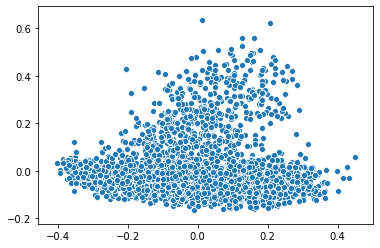

In [50]:
sns.scatterplot(x=Xr_tfidf[:,0], y=Xr_tfidf[:,1])

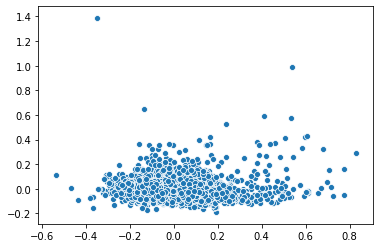

In [51]:
sns.scatterplot(x=Xr_mean[:,0], y=Xr_mean[:,1])

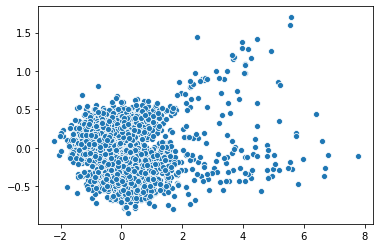

In [52]:
sns.scatterplot(x=Xr_max[:,0], y=Xr_max[:,1])

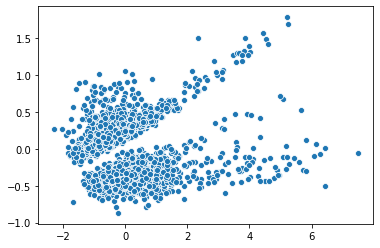

In [53]:
sns.scatterplot(x=Xr_min[:,0], y=Xr_min[:,1])

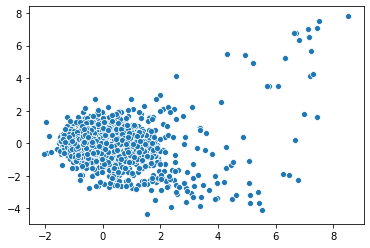

In [54]:
sns.scatterplot(x=Xr_bmean[:,0], y=Xr_bmean[:,1])

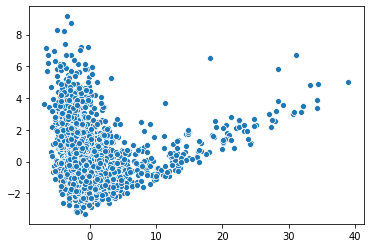

In [55]:
sns.scatterplot(x=Xr_bmax[:,0], y=Xr_bmax[:,1])

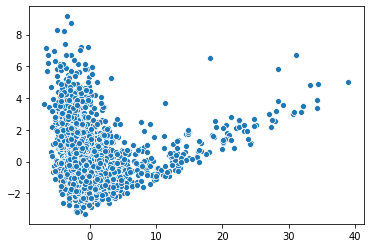

In [56]:
sns.scatterplot(x=Xr_bmin[:,0], y=Xr_bmin[:,1])

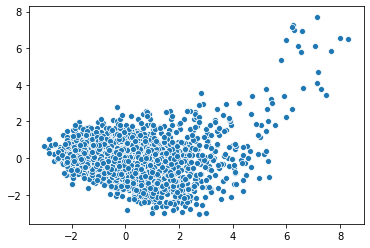

In [57]:
sns.scatterplot(x=Xr_bht[:,0], y=Xr_bht[:,1])

# Dimensionality reduction with UMAP

In [58]:
from umap import UMAP

In [59]:
umap = UMAP(n_components=2)

Xru_tfidf = umap.fit_transform(X_tfidf)

In [60]:
umap = UMAP(n_components=2)

Xru_mean = umap.fit_transform(mean_embeddings)

In [61]:
umap = UMAP(n_components=2)

Xru_max = umap.fit_transform(max_embeddings)

In [62]:
umap = UMAP(n_components=2)

Xru_min = umap.fit_transform(min_embeddings)

In [63]:
umap = UMAP(n_components=2)

Xru_bmean = umap.fit_transform(mean_bert)

In [64]:
umap = UMAP(n_components=2)

Xru_bmax = umap.fit_transform(max_bert)

In [65]:
umap = UMAP(n_components=2)

Xru_bmin = umap.fit_transform(min_bert)

In [66]:
umap = UMAP(n_components=2)

Xru_bht = umap.fit_transform(ht_bert)

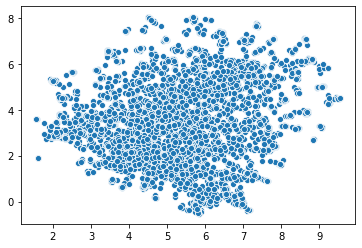

In [67]:
sns.scatterplot(x=Xru_tfidf[:,0], y=Xru_tfidf[:,1])

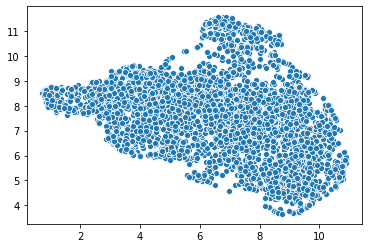

In [68]:
sns.scatterplot(x=Xru_mean[:,0], y=Xru_mean[:,1])

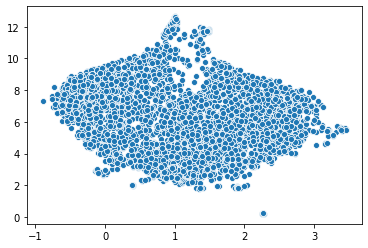

In [69]:
sns.scatterplot(x=Xru_max[:,0], y=Xru_max[:,1])

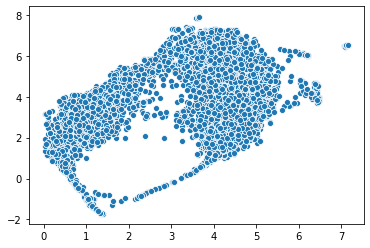

In [70]:
sns.scatterplot(x=Xru_min[:,0], y=Xru_min[:,1])

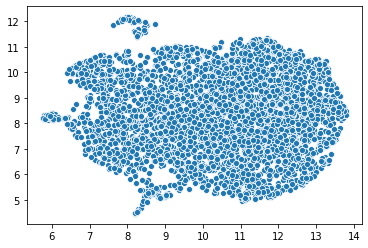

In [71]:
sns.scatterplot(x=Xru_bmean[:,0], y=Xru_bmean[:,1])

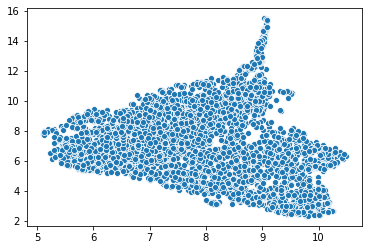

In [72]:
sns.scatterplot(x=Xru_bmax[:,0], y=Xru_bmax[:,1])

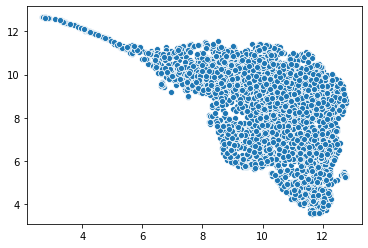

In [73]:
sns.scatterplot(x=Xru_bmin[:,0], y=Xru_bmin[:,1])

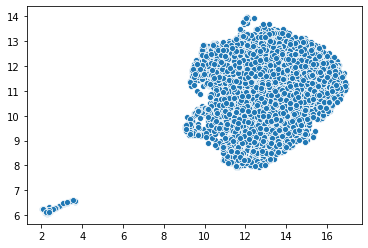

In [74]:
sns.scatterplot(x=Xru_bht[:,0], y=Xru_bht[:,1])

# Dimensionality reduction with TSNE

In [75]:
from sklearn.manifold import TSNE

In [76]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_tidf = tsne.fit_transform(X_tfidf)

In [77]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_mean = tsne.fit_transform(mean_embeddings)

In [78]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_max = tsne.fit_transform(max_embeddings)

In [79]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_min = tsne.fit_transform(min_embeddings)

In [80]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bmean = tsne.fit_transform(mean_bert)

In [81]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bmax = tsne.fit_transform(max_bert)

In [82]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bmin = tsne.fit_transform(min_bert)

In [83]:
tsne = TSNE(n_components=2, n_jobs=-1)

Xrt_bht = tsne.fit_transform(ht_bert)

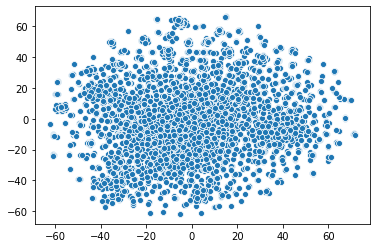

In [84]:
sns.scatterplot(x=Xrt_tidf[:,0], y=Xrt_tidf[:,1])

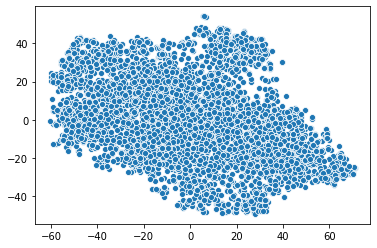

In [85]:
sns.scatterplot(x=Xrt_mean[:,0], y=Xrt_mean[:,1])

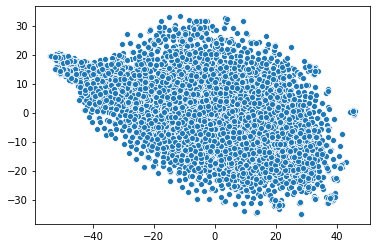

In [86]:
sns.scatterplot(x=Xrt_max[:,0], y=Xrt_max[:,1])

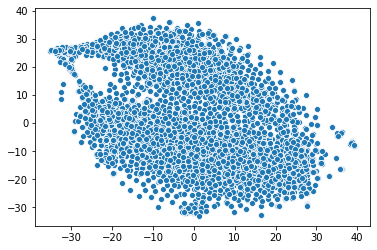

In [87]:
sns.scatterplot(x=Xrt_min[:,0], y=Xrt_min[:,1])

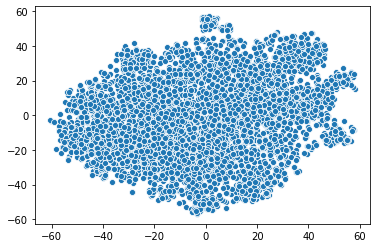

In [88]:
sns.scatterplot(x=Xrt_bmean[:,0], y=Xrt_bmean[:,1])

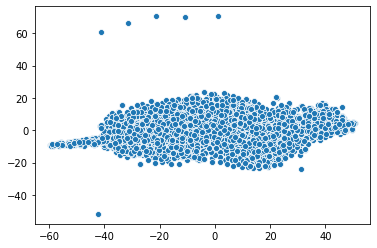

In [89]:
sns.scatterplot(x=Xrt_bmax[:,0], y=Xrt_bmax[:,1])

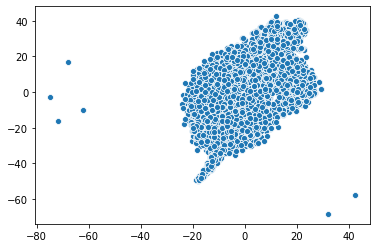

In [90]:
sns.scatterplot(x=Xrt_bmin[:,0], y=Xrt_bmin[:,1])

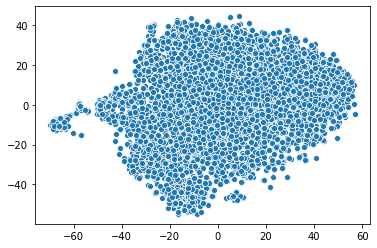

In [91]:
sns.scatterplot(x=Xrt_bht[:,0], y=Xrt_bht[:,1])

# Some clusterings tests

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/lennartkelle

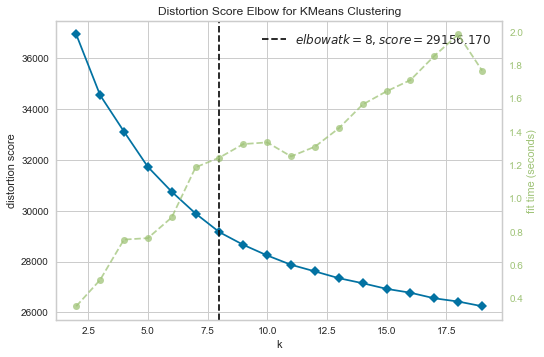

In [92]:
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_jobs=-1)

visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(ht_bert)
visualizer.show()

In [94]:
# => Number of cluster: 3 (??!?!?!?!?!?!)
N_CLUSTER = 8

In [98]:
from sklearn.cluster import DBSCAN, OPTICS, KMeans
from sklearn.mixture import GaussianMixture
clu = KMeans(n_clusters=N_CLUSTER, n_jobs=-1)
#clu = DBSCAN(n_jobs=-1, metric='cosine', **{'eps': 0.5, 'min_samples': 8})
#clu = OPTICS(n_clusters=N_CLUSTER)
#clu = GaussianMixture(n_components=N_CLUSTER)
#clu = DBSCAN(n_jobs=-1)
#clu = Birch(n_clusters=6)
labels = clu.fit_predict(ht_bert)

/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


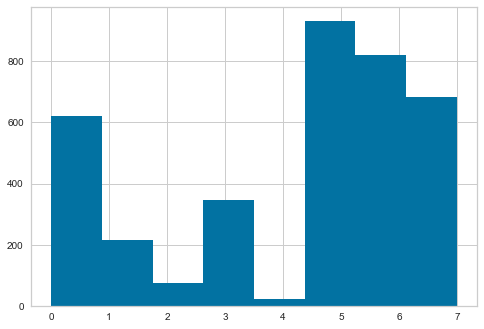

In [99]:
import matplotlib.pyplot as plt

plt.hist(labels, bins=N_CLUSTER)
plt.show()

In [100]:
import seaborn as sns

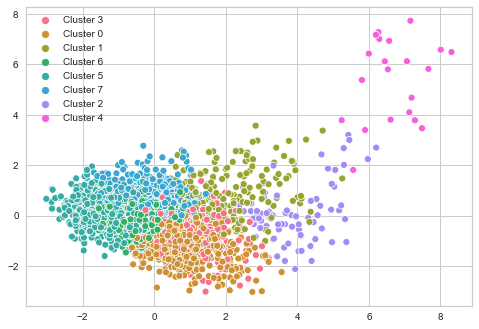

In [101]:
sns.scatterplot(x=Xr_bht[:,0], y=Xr_bht[:,1], hue=[f'Cluster {l}' for l in labels])

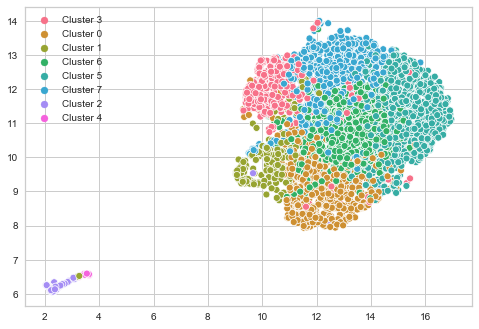

In [102]:
sns.scatterplot(x=Xru_bht[:,0], y=Xru_bht[:,1], hue=[f'Cluster {l}' for l in labels])

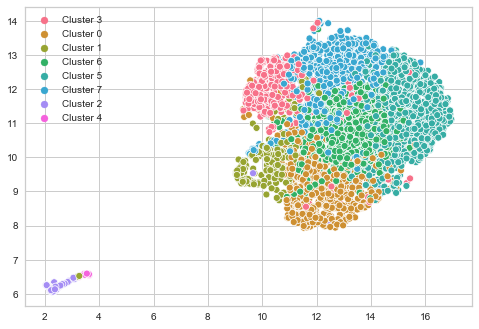

In [103]:
sns.scatterplot(x=Xru_bht[:,0], y=Xru_bht[:,1], hue=[f'Cluster {l}' for l in labels])

# Get 20 most frequent word for each cluster (excluding stopwords)

In [121]:
import re
from collections import Counter
from stop_words import get_stop_words
mfw_per_cluster = []

for label in set(labels):
    curr_df = df[labels==label]
    text = " ".join(curr_df.text.str.lower())
    tokens = [t for t in re.findall(r'\w+', text) if t not in get_stop_words('de')]
    freqs = Counter(tokens)
    print(f'Cluster {label}')
    print(f'{curr_df.shape[0]} Samples')
    print(*freqs.most_common(100), sep='\n')
    mfw_per_cluster.append(freqs.most_common(200))
    print("\n\n")
    

Cluster 0
622 Samples
('ja', 27892)
('nein', 15754)
('gut', 11866)
('mal', 11726)
('schon', 11421)
('hast', 11254)
('s', 8970)
('weiß', 8413)
('mehr', 8284)
('geht', 7777)
('los', 7466)
('immer', 7410)
('bitte', 6841)
('oh', 6811)
('okay', 6298)
('mann', 6046)
('danke', 5858)
('sagen', 5776)
('gibt', 5745)
('hey', 5725)
('sehen', 5579)
('tun', 5393)
('müssen', 5361)
('wer', 5351)
('leben', 5330)
('warum', 5308)
('gehen', 5227)
('komm', 5128)
('wirklich', 5019)
('einfach', 4922)
('wurde', 4914)
('nie', 4894)
('wissen', 4853)
('ganz', 4722)
('vielleicht', 4580)
('zeit', 4559)
('tut', 4296)
('ok', 4270)
('leute', 4098)
('heute', 4082)
('zwei', 4010)
('kommen', 4006)
('kommt', 3966)
('wäre', 3845)
('na', 3738)
('willst', 3711)
('klar', 3569)
('gott', 3554)
('gesagt', 3546)
('leid', 3509)
('macht', 3481)
('zurück', 3477)
('weißt', 3407)
('hallo', 3378)
('sicher', 3309)
('genau', 3294)
('frau', 3216)
('kannst', 3166)
('tag', 3129)
('menschen', 3074)
('scheiße', 3037)
('sagte', 3007)
('lassen

Cluster 6
821 Samples
('ja', 41940)
('nein', 24565)
('gut', 19897)
('hast', 17346)
('mal', 15580)
('schon', 14588)
('s', 14129)
('geht', 11623)
('weiß', 10747)
('bitte', 10643)
('los', 10372)
('danke', 10208)
('mehr', 9157)
('okay', 7950)
('warum', 7887)
('komm', 7738)
('immer', 7728)
('gehen', 7397)
('sagen', 7147)
('mann', 7099)
('wer', 6958)
('sehen', 6895)
('oh', 6767)
('gibt', 6377)
('hallo', 6217)
('nie', 6126)
('tun', 6060)
('tut', 6046)
('müssen', 5757)
('ganz', 5709)
('willst', 5697)
('frau', 5594)
('hey', 5523)
('wirklich', 5491)
('kommt', 5463)
('vielleicht', 5440)
('leben', 5403)
('na', 5395)
('wissen', 5238)
('kommen', 5229)
('heute', 5177)
('zwei', 4979)
('leid', 4978)
('einfach', 4953)
('gesagt', 4843)
('klar', 4830)
('zeit', 4823)
('tag', 4469)
('zurück', 4422)
('weißt', 4365)
('macht', 4356)
('schön', 4346)
('gott', 4311)
('lass', 4295)
('kannst', 4269)
('ab', 4175)
('sicher', 4105)
('vater', 4084)
('morgen', 4046)
('wäre', 4016)
('liebe', 4003)
('wurde', 3968)
('mach'

In [123]:
mfw_per_cluster[2]

[('chffffff', 986),
 ('ch00ffff', 986),
 ('q2', 622),
 ('a2', 622),
 ('hast', 118),
 ('s', 115),
 ('ja', 76),
 ('mal', 71),
 ('komm', 66),
 ('lass', 61),
 ('schon', 61),
 ('geht', 58),
 ('bitte', 58),
 ('gut', 56),
 ('gehen', 54),
 ('leben', 53),
 ('los', 53),
 ('nein', 52),
 ('zurück', 49),
 ('warum', 49),
 ('mehr', 49),
 ('weiß', 44),
 ('sehen', 43),
 ('wer', 39),
 ('lee', 39),
 ('gibt', 38),
 ('wurde', 37),
 ('mann', 36),
 ('geh', 36),
 ('tochter', 35),
 ('her', 35),
 ('einfach', 35),
 ('zeit', 32),
 ('welt', 32),
 ('vater', 32),
 ('willst', 32),
 ('tun', 32),
 ('müssen', 31),
 ('kommt', 31),
 ('gott', 30),
 ('hey', 30),
 ('tut', 29),
 ('oh', 29),
 ('passiert', 29),
 ('immer', 28),
 ('mach', 28),
 ('kommen', 28),
 ('hallo', 28),
 ('zwei', 26),
 ('sagen', 26),
 ('ruhe', 26),
 ('macht', 26),
 ('leid', 26),
 ('gib', 26),
 ('hause', 25),
 ('nie', 24),
 ('wäre', 24),
 ('raus', 24),
 ('töten', 24),
 ('wissen', 24),
 ('wirklich', 24),
 ('schnell', 24),
 ('später', 23),
 ('kannst', 23),
 ('

In [126]:
df[labels==2]

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,endYear,runtimeMinutes,averageRating,numVotes,fasttext_mean,fasttext_max,fasttext_min,bert_mean,bert_max,bert_min
79,24811,3567922.xml,1941 Deutschland besetzt Weißrussland . Das SS...,tt1034303,"Action,Drama,History",2008.0,"English, German, Russian",untokenisiert,137.0,nm0001880,...,NaN,137.0,7.2,134537.0,"[-0.15479471, 0.11444328, -0.19011623, -0.2670...","[0.21191, 0.66869, 0.31534, 0.22592, 0.61382, ...","[-0.81004, -0.42431, -0.79963, -0.97645, -0.33...","[0.117386684, 0.19601762, -0.32482678, -0.2730...","[-0.5625707, -0.62838405, -1.1794338, -1.50778...","[-0.5625707, -0.62838405, -1.1794338, -1.50778..."
164,25456,6728314.xml,"Eine Parallelwelt , in der kein Zweiter Weltkr...",tt1156395,"Action,Adventure,Crime",2008.0,Japanese,untokenisiert,137.0,nm0766262,...,NaN,137.0,6.6,1936.0,"[-0.12313803, 0.094178274, -0.16133015, -0.202...","[0.21191, 0.70891, 0.35327, 0.36508, 0.62648, ...","[-0.52357, -0.38647, -0.68448, -0.92483, -0.37...","[0.06938919, -0.30238622, 0.09658113, -0.15368...","[-0.4519036, -0.5406909, -0.25930643, -0.67347...","[-0.4519036, -0.5406909, -0.25930643, -0.67347..."
280,27612,3953417.xml,"Waris ! Alter Mann ! Mama sagt , wir müssen we...",tt1054580,"Biography,Drama",2009.0,"English, Somali, French",untokenisiert,120.0,nm0394776,...,NaN,120.0,7.4,11939.0,"[-0.08349391, 0.14488843, -0.14235547, -0.2473...","[0.31432, 0.85483, 0.41658, 0.45468, 0.87685, ...","[-0.75495, -0.52082, -0.80797, -0.95089, -0.44...","[-0.09926091, 0.13912298, 0.16239963, -0.37633...","[-0.9806289, -0.9251068, -1.7163273, -1.514876...","[-0.9806289, -0.9251068, -1.7163273, -1.514876..."
326,27758,3617688.xml,DUBAI - 4. JULI 2003 KONSULAT DER VEREINIGTEN ...,tt1135487,"Comedy,Crime,Romance",2009.0,"English, Spanish, Russian, German",untokenisiert,125.0,nm0006904,...,NaN,125.0,6.1,46266.0,"[-0.1633361, 0.1101197, -0.17436314, -0.179129...","[0.32661, 0.92495, 0.40009, 0.40244, 0.87685, ...","[-1.0878, -0.29542, -0.68347, -0.81381, -0.403...","[0.27652812, 0.2462699, 0.1793985, 0.13812582,...","[-0.20066446, -0.09812525, -0.23964182, -0.573...","[-0.20066446, -0.09812525, -0.23964182, -0.573..."
343,27815,4230577.xml,Fick dich ! Sehr klug . Ich wollte dich hier u...,tt1160368,"Action,Crime,Thriller",2009.0,English,untokenisiert,108.0,nm0001317,...,NaN,108.0,5.6,26745.0,"[-0.09264228, 0.07317748, -0.19504812, -0.2178...","[0.21191, 0.74174, 0.16671, 0.13086, 0.73974, ...","[-0.68856, -0.25165, -0.76414, -0.71195, -0.18...","[0.15629932, 0.06328275, 0.08269841, -0.044207...","[-0.41844937, -0.48664966, -0.3636938, -0.5206...","[-0.41844937, -0.48664966, -0.3636938, -0.5206..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,57196,7063409.xml,"Hallo , Fremder Es ist so schön , dich wiederz...",tt4975722,Drama,2016.0,NaN,untokenisiert,111.0,nm1503575,...,NaN,111.0,7.4,255700.0,"[-0.07911178, 0.15209259, -0.16167703, -0.2118...","[0.29948, 0.74174, 0.10975, 0.047029, 0.73974,...","[-0.3363, -0.17571, -0.6073, -0.50702, -0.3311...","[-0.13435131, -0.09205904, 0.09140995, -0.2120...","[-0.33123526, -0.37157995, -0.14036655, -0.442...","[-0.33123526, -0.37157995, -0.14036655, -0.442..."
3649,59589,7038592.xml,In Zukunft wird die Grenze zwischen Mensch und...,tt1219827,"Action,Crime,Drama",2017.0,NaN,untokenisiert,107.0,nm2782185,...,NaN,107.0,6.3,188920.0,"[-0.10015893, 0.08424241, -0.1462245, -0.23669...","[0.57557, 0.75827, 0.46791, 0.41018, 0.86931, ...","[-0.9868, -0.52082, -0.8378, -1.2254, -0.53495...","[0.14097707, 0.32568845, -0.13818824, -0.32106...","[-0.81128454, -0.7639, -1.0378224, -1.40998, -...","[-0.81128454, -0.7639, -1.0378224, -1.40998, -..."
3656,59603,7068958.xml,Der Tod ist nur die Tür zum neuen Leben . Wir ...,tt2345759,"Action,Adventure,Fantasy",2017.0,English,untokenisiert,110.0,nm0476064,...,NaN,110.0,5.4,166365.0,"[-0.11649471, 0.16953923, -0.20595174, -0.2748...","[0.31432

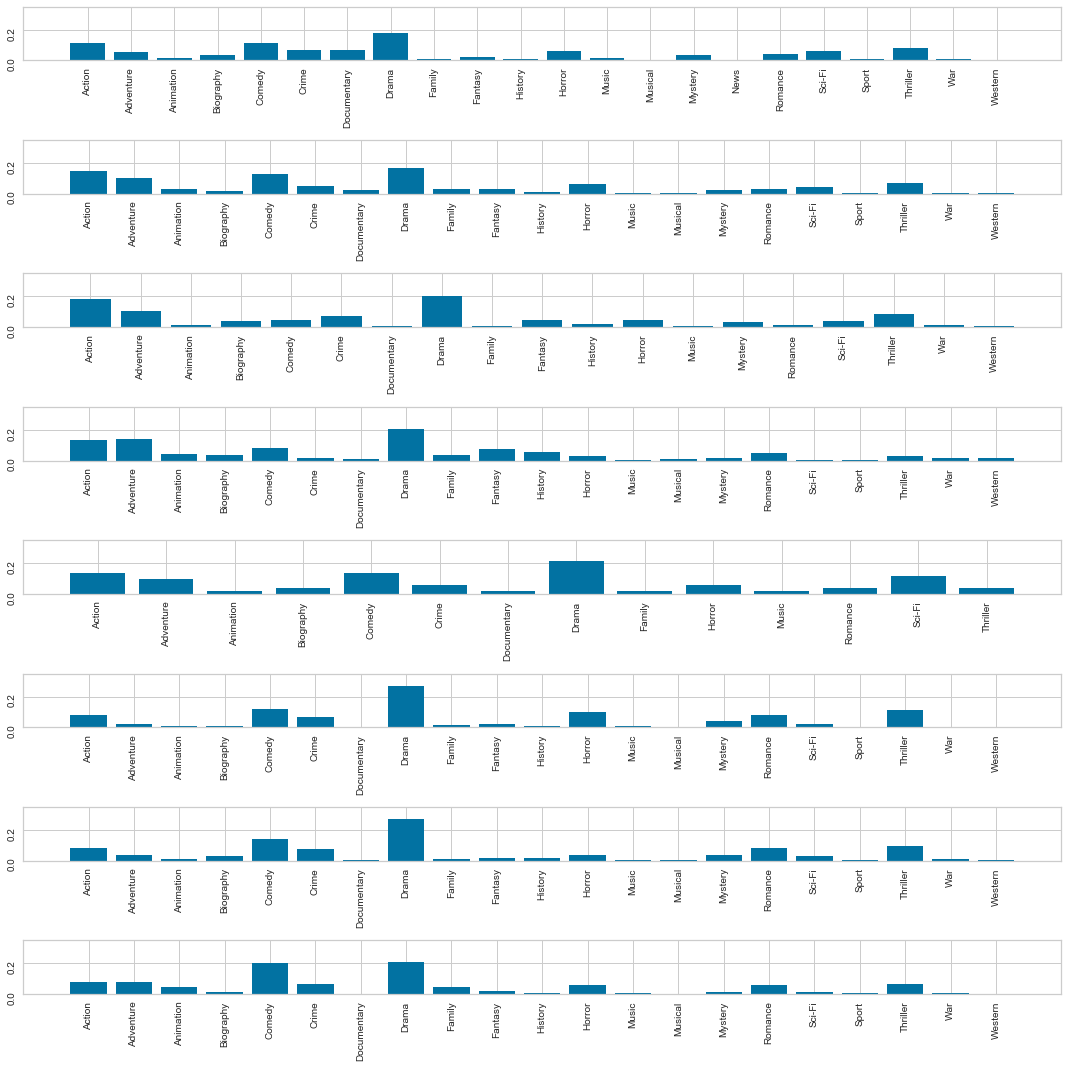

In [106]:
import matplotlib.pyplot as plt
from collections import Counter

unique_genres = set([genre for entry in df.genre.dropna() for genre in entry.split(',')])

fig, axs = plt.subplots(len(set(labels)), figsize=(15,15))
plt.xticks(rotation='vertical')


for index, label in enumerate(set(labels)):
    curr_df = df[labels==label]
    genre_freqs = Counter([genre for entry in curr_df.genre.dropna() for genre in entry.split(',')])
    genre_freqs = dict(sorted(zip(genre_freqs.keys(), genre_freqs.values()), key=lambda x: x[0]))
    relative_freqs = [entry/sum(genre_freqs.values()) for entry in genre_freqs.values()]
    axs[index].bar(list(genre_freqs.keys()), relative_freqs)
    axs[index].tick_params(labelrotation=90)
    axs[index].set_ylim([0, 0.35])

plt.tight_layout()
plt.show()

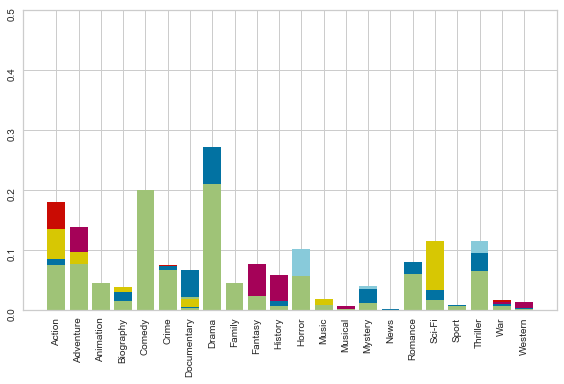

In [107]:
import matplotlib.pyplot as plt


unique_genres = set([genre for entry in df.genre.dropna() for genre in entry.split(',')])

ax = plt.subplot()


for index, label in enumerate(set(labels)):
    curr_df = df[labels==label]
    genre_freqs = Counter([genre for entry in curr_df.genre.dropna() for genre in entry.split(',')])
    genre_freqs = dict(sorted(zip(genre_freqs.keys(), genre_freqs.values()), key=lambda x: x[0]))
    relative_freqs = [entry/sum(genre_freqs.values()) for entry in genre_freqs.values()]
    ax.bar(list(genre_freqs.keys()), relative_freqs)
    ax.tick_params(labelrotation=90)
    ax.set_ylim([0, 0.5])

plt.tight_layout()
plt.show()

In [108]:
from collections import Counter
import pandas as pd


unique_genres = set([genre for entry in df.genre.dropna() for genre in entry.split(',')])


data = []
for index, label in enumerate(set(labels)):
    curr_df = df[labels==label]
    genre_freqs = Counter([genre for entry in curr_df.genre.dropna() for genre in entry.split(',')])
    genre_freqs = dict(sorted(zip(genre_freqs.keys(), genre_freqs.values()), key=lambda x: x[0]))
    relative_freqs = {genre: entry/sum(genre_freqs.values()) for genre, entry in genre_freqs.items()}
    relative_freqs['Cluster'] = f'Cluster{index}'
    data.append(relative_freqs)

clu_df = pd.DataFrame.from_dict(data).fillna(0).set_index('Cluster')

In [118]:
clu_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
Cluster0,0.110956,0.053036,0.016748,0.034194,0.115841,0.066294,0.066294,0.178646,0.009072,0.021633,...,0.003489,0.037683,0.001396,0.043266,0.059316,0.007676,0.079553,0.007676,0.003489,Cluster0
Cluster1,0.145957,0.104536,0.033531,0.017751,0.128205,0.053254,0.021696,0.169625,0.029586,0.029586,...,0.001972,0.027613,0.000000,0.033531,0.043393,0.001972,0.069034,0.005917,0.001972,Cluster1
Cluster2,0.180851,0.106383,0.015957,0.037234,0.047872,0.074468,0.010638,0.202128,0.005319,0.047872,...,0.000000,0.031915,0.000000,0.015957,0.042553,0.000000,0.085106,0.015957,0.005319,Cluster2
Cluster3,0.133412,0.138135,0.041322,0.035419,0.081464,0.015348,0.008264,0.207792,0.037780,0.076741,...,0.007084,0.016529,0.000000,0.049587,0.005903,0.001181,0.027155,0.014168,0.014168,Cluster3
Cluster4,0.134615,0.096154,0.019231,0.038462,0.134615,0.057692,0.019231,0.211538,0.019231,0.000000,...,0.000000,0.000000,0.000000,0.038462,0.115385,0.000000,0.038462,0.000000,0.000000,Cluster4
Cluster5,0.081305,0.023304,0.008286,0.010875,0.118074,0.066287,0.004143,0.269808,0.016572,0.020715,...,0.002071,0.039358,0.000000,0.077162,0.023822,0.002071,0.114448,0.004661,0.001036,Cluster5
Cluster6,0.085284,0.034560,0.007804,0.030658,0.142698,0.074136,0.004459,0.272018,0.010591,0.015608,...,0.001115,0.034560,0.000000,0.079710,0.032887,0.006132,0.095875,0.009476,0.003902,Cluster6
Cluster7,0.075747,0.076442,0.045170,0.014593,0.199444,0.066018,0.002780,0.210563,0.044475,0.022933,...,0.002085,0.012509,0.000000,0.059764,0.015983,0.006949,0.064628,0.006254,0.001390,Cluster7


In [115]:
clu_df.max(axis=0)

Action           0.180851
Adventure        0.138135
Animation       0.0451703
Biography       0.0384615
Comedy           0.199444
Crime           0.0744681
Documentary     0.0662945
Drama            0.272018
Family          0.0444753
Fantasy         0.0767414
History         0.0578512
Horror            0.10202
Music           0.0192308
Musical        0.00708383
Mystery         0.0393578
News           0.00139567
Romance         0.0797101
Sci-Fi           0.115385
Sport           0.0076762
Thriller         0.114448
War             0.0159574
Western         0.0141677
Cluster          Cluster7
dtype: object

In [119]:
clu_df['Cluster'] = clu_df.index.to_series()
plot_df = pd.melt(clu_df, id_vars="Cluster", var_name="Genre", value_name="Rel. Freq.")
plot_df

,Cluster,Genre,Rel. Freq.
0,Cluster0,Action,0.110956
1,Cluster1,Action,0.145957
2,Cluster2,Action,0.180851
3,Cluster3,Action,0.133412
4,Cluster4,Action,0.134615
...,...,...,...
171,Cluster3,Western,0.014168
172,Cluster4,Western,0.000000
173,Cluster5,Western,0.001036
174,Cluster6,Western,0.003902


/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 3600x1800 with 0 Axes>

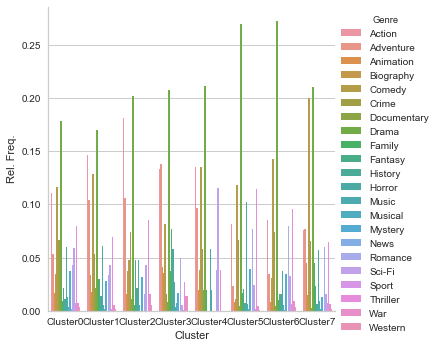

In [120]:
plt.figure(figsize=(50, 25))
sns.factorplot(x='Cluster', y='Rel. Freq.', hue='Genre', data=plot_df, kind='bar')

# Genre shit

In [82]:
from collections import Counter
genre_freqs = Counter([genre for entry in df.genre.dropna() for genre in entry.split(',')])

In [83]:
genre_freqs.most_common()

[('Drama', 1879),
 ('Comedy', 1087),
 ('Action', 806),
 ('Thriller', 676),
 ('Crime', 508),
 ('Romance', 504),
 ('Horror', 498),
 ('Adventure', 488),
 ('Sci-Fi', 254),
 ('Mystery', 244),
 ('Fantasy', 221),
 ('Biography', 194),
 ('Family', 177),
 ('Animation', 175),
 ('Documentary', 136),
 ('History', 127),
 ('War', 64),
 ('Music', 62),
 ('Sport', 38),
 ('Western', 30),
 ('Musical', 21),
 ('News', 2)]

In [8]:
y = []
for entry in df.genre:
    genres = entry.split(',')
    if 'Drama' in genres and 'Comedy' not in genres:
        y.append('Drama')
    elif 'Drama' not in genres and 'Comedy' in genres:
        y.append('Comedy')
    else:
        y.append('Mixed')

In [12]:
data = [(mean_bert, y), (ht_bert, y), (max_bert, y), (min_bert, y), (X_tfidf, y)]

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.base import clone as clone_estimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook

classifier = LinearSVC()

for X, y in tqdm_notebook(data):

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    clf = clone_estimator(classifier)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))

<ipython-input-13-3aae28c23868>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for X, y in tqdm_notebook(data):


/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

      Comedy       0.63      0.49      0.55       174
       Drama       0.74      0.48      0.58       368
       Mixed       0.54      0.78      0.64       388

    accuracy                           0.61       930
   macro avg       0.64      0.58      0.59       930
weighted avg       0.64      0.61      0.60       930



/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

      Comedy       0.42      0.28      0.34       174
       Drama       0.48      0.82      0.61       368
       Mixed       0.56      0.27      0.36       388

    accuracy                           0.49       930
   macro avg       0.49      0.46      0.44       930
weighted avg       0.50      0.49      0.45       930



/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

      Comedy       0.32      0.48      0.39       174
       Drama       0.49      0.65      0.56       368
       Mixed       0.53      0.26      0.34       388

    accuracy                           0.45       930
   macro avg       0.45      0.46      0.43       930
weighted avg       0.48      0.45      0.44       930



/Users/lennartkeller/opt/anaconda3/envs/clustering/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


              precision    recall  f1-score   support

      Comedy       0.31      0.57      0.40       174
       Drama       0.47      0.73      0.57       368
       Mixed       0.60      0.05      0.09       388

    accuracy                           0.42       930
   macro avg       0.46      0.45      0.35       930
weighted avg       0.49      0.42      0.34       930

              precision    recall  f1-score   support

      Comedy       0.64      0.50      0.56       174
       Drama       0.61      0.67      0.64       368
       Mixed       0.55      0.55      0.55       388

    accuracy                           0.59       930
   macro avg       0.60      0.58      0.59       930
weighted avg       0.59      0.59      0.59       930




In [87]:
df[labels==2]

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,...,endYear,runtimeMinutes,averageRating,numVotes,fasttext_mean,fasttext_max,fasttext_min,bert_mean,bert_max,bert_min
1196,35349,5594984.xml,"Ich war immer überzeugt , dass ich mich irgend...",tt1669694,"Action,Comedy,Crime",2011.0,French,untokenisiert,88.0,nm2056306,...,NaN,88.0,5.7,527.0,"[-0.06849818, 0.13438015, -0.14359824, -0.2292...","[0.57557, 1.1098, 0.74069, 0.62292, 1.0311, 1....","[-0.90807, -0.60063, -1.0368, -1.0677, -0.5022...","[0.03153143, 0.4283942, 0.14000604, -0.1168491...","[-1.459139, -1.3552563, -1.2207671, -1.6550173...","[-1.459139, -1.3552563, -1.2207671, -1.6550173..."
1327,36307,6004119.xml,"Ich weinte bei meiner Geburt , und jeder Tag z...",tt1841705,Comedy,2011.0,French,untokenisiert,NaN,nm0948248,...,NaN,NaN,6.2,114.0,"[-0.068562515, 0.12208753, -0.1497204, -0.2214...","[0.57557, 1.2107, 0.74069, 0.62348, 1.01, 1.03...","[-0.98232, -0.67739, -0.97026, -1.1077, -0.586...","[0.057626005, 0.42247808, 0.13699533, -0.13043...","[-0.9588602, -0.78188914, -1.2961601, -1.79361...","[-0.9588602, -0.78188914, -1.2961601, -1.79361..."
2155,42410,5848331.xml,Das Wasser ist zu niedrig . Da beißt nichts ! ...,tt2190760,Comedy,2013.0,Spanish,untokenisiert,86.0,nm2569676,...,NaN,86.0,5.5,346.0,"[-0.07145365, 0.14559387, -0.14605658, -0.2531...","[0.57557, 1.0938, 0.45954, 0.64805, 0.87685, 1...","[-0.88971, -0.52082, -1.0407, -1.0776, -0.6362...","[0.04590466, 0.4349698, 0.17289613, -0.1348908...","[-0.9519963, -0.97106254, -1.2809781, -2.17925...","[-0.9519963, -0.97106254, -1.2809781, -2.17925..."
2864,48366,6294224.xml,Fünf ! Vier ! Drei ! Zwei ! Eins ! Null ! Die ...,tt3399024,"Comedy,Drama,Romance",2014.0,French,untokenisiert,118.0,"nm0865918,nm0619923",...,NaN,118.0,6.7,14302.0,"[-0.07552282, 0.12665722, -0.13230838, -0.2226...","[0.71723, 1.1468, 0.68649, 0.62057, 1.2057, 1....","[-1.0886, -0.53268, -1.0838, -1.2674, -0.60162...","[0.052256126, 0.453029, 0.14076507, -0.0872942...","[-1.0119293, -0.86987305, -1.2207671, -1.95122...","[-1.0119293, -0.86987305, -1.2207671, -1.95122..."


In [88]:
label_powersets = {}
trans_genre_labels = []

for index, genre_comb in enumerate(df.genre):
    if not label_powersets.get(genre_comb):
        label_powersets[genre_comb] = index
    trans_genre_labels.append(label_powersets[genre_comb])
len(label_powersets)

358

In [89]:
from sklearn.preprocessing import MultiLabelBinarizer

labels = df.genre.str.split(',')

mlb  = MultiLabelBinarizer()

y = mlb.fit_transform(labels)
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western'], dtype=object)

In [90]:
N_TOP = 7
top_genres = mlb.classes_[np.count_nonzero(y, axis=0).argsort()[-N_TOP:][::-1]][::-1]
top_genres

array(['Horror', 'Romance', 'Crime', 'Thriller', 'Action', 'Comedy',
       'Drama'], dtype=object)

In [91]:
trans = []
for l in labels:
    label = ""
    for genre in top_genres:
        if genre in l:
            label = genre
    if not label:
        label = "Unknown"
    trans.append(label)

In [92]:
trans.count("Unknown")

251

In [93]:
Counter(trans)

Counter({'Drama': 1879,
         'Comedy': 699,
         'Action': 441,
         'Romance': 15,
         'Unknown': 251,
         'Horror': 135,
         'Thriller': 275,
         'Crime': 24})

In [94]:
df.shape[0] - df[df.production_region.isna()].shape[0], df.production_region.unique().shape

(3160, (506,))

In [95]:
from collections import Counter

Counter(df.production_region).most_common(30)

[('English', 1397),
 (nan, 559),
 ('French', 210),
 ('German', 180),
 ('Japanese', 119),
 ('Spanish', 68),
 ('Korean', 50),
 ('English, Spanish', 40),
 ('Turkish', 35),
 ('Mandarin', 32),
 ('English, French', 32),
 ('French, English', 31),
 ('Norwegian', 29),
 ('Dutch', 25),
 ('Danish', 22),
 ('Swedish', 21),
 ('German, English', 21),
 ('Italian', 19),
 ('Cantonese', 16),
 ('Thai', 16),
 ('Russian', 16),
 ('Icelandic', 15),
 ('English, German', 15),
 ('Hindi', 13),
 ('English, Japanese', 13),
 ('English, Russian', 12),
 ('English, Italian', 9),
 ('Portuguese', 9),
 ('Japanese, English', 9),
 ('German, Turkish', 8)]

In [96]:
emb = mean_bert[(df.production_region == "English") | (df.production_region == "French")]
eng_french =  df[(df.production_region == "English") | (df.production_region == "French")]
emb.shape, eng_french.shape

((1607, 768), (1607, 26))

In [97]:
from umap import UMAP

umap = UMAP(n_components=2)

r = umap.fit_transform(emb)

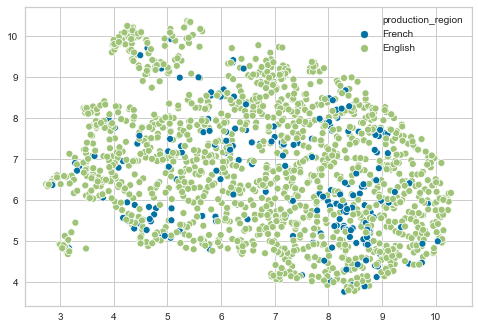

In [98]:
sns.scatterplot(x=r[:,0], y=r[:,1], hue=eng_french.production_region)

In [99]:
en = df[(df.production_region == "English")]
emb_en = X_tfidf.toarray()[(df.production_region == "English")]

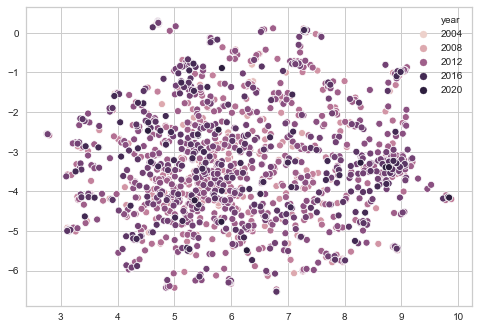

In [100]:
from umap import UMAP

umap = UMAP(n_components=2)

r = umap.fit_transform(emb_en)
sns.scatterplot(x=r[:,0], y=r[:,1], hue=en.year)

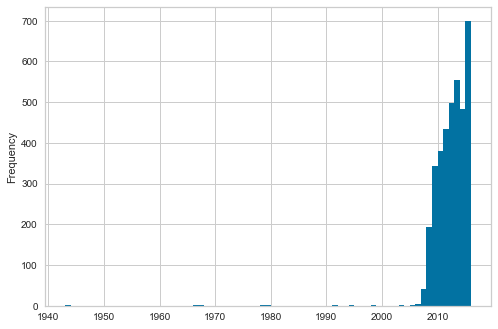

In [101]:
df.year.plot(kind='hist', bins=range(int(df.year.min()), int(df.year.max())))

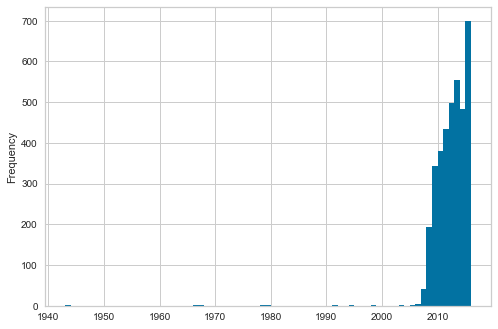

In [102]:
df.year.plot(kind='hist', bins=range(int(df.year.min()), int(df.year.max())))

In [103]:
Counter([i for i in df.genre if len(i.split(',')) > 1]).most_common(20)

[('Comedy,Drama', 144),
 ('Drama,Romance', 141),
 ('Comedy,Drama,Romance', 121),
 ('Comedy,Romance', 87),
 ('Horror,Thriller', 79),
 ('Drama,Thriller', 77),
 ('Action,Crime,Drama', 71),
 ('Crime,Drama,Thriller', 65),
 ('Adventure,Animation,Comedy', 65),
 ('Action,Crime,Thriller', 54),
 ('Action,Adventure,Sci-Fi', 46),
 ('Action,Comedy,Crime', 43),
 ('Action,Adventure,Drama', 41),
 ('Crime,Drama', 38),
 ('Biography,Drama', 35),
 ('Biography,Drama,History', 33),
 ('Crime,Drama,Mystery', 33),
 ('Action,Thriller', 31),
 ('Horror,Mystery,Thriller', 30),
 ('Action,Adventure,Fantasy', 30)]

In [257]:
from scipy.spatial.distance import pdist, cosine, squareform
dm = pdist(mean_embeddings, cosine)
dm = squareform(dm)

In [260]:
dm.mean()

0.016269708468936345

In [263]:
from sklearn.model_selection import ParameterGrid
from tqdm.notebook import tqdm
from collections import Counter

params = ParameterGrid({
    'eps': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
    'min_samples': list(range(2,11))
})

results = []
for param_comb in tqdm_notebook(params):
    clu = DBSCAN(n_jobs=-1, metric='cosine', **param_comb)
    labels = clu.fit_predict(min_bert)
    cluster_distribution = np.asarray(list(Counter(labels).values()))
    result = {
        'params': param_comb,
        'n_cluster': len(np.unique(labels)),
        'cluster_std': round(cluster_distribution.std(), 2),
        'cluster_mean': round(cluster_distribution.mean(), 2)
    }
    results.append(result)

print(*sorted(results, key=lambda x: x['n_cluster'], reverse=True), sep='\n')

<ipython-input-263-fd31331aeed7>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param_comb in tqdm_notebook(params):



{'params': {'eps': 0.01, 'min_samples': 2}, 'n_cluster': 10, 'cluster_std': 992.48, 'cluster_mean': 371.9}
{'params': {'eps': 0.005, 'min_samples': 2}, 'n_cluster': 4, 'cluster_std': 1606.91, 'cluster_mean': 929.75}
{'params': {'eps': 0.001, 'min_samples': 2}, 'n_cluster': 4, 'cluster_std': 1606.91, 'cluster_mean': 929.75}
{'params': {'eps': 0.05, 'min_samples': 2}, 'n_cluster': 3, 'cluster_std': 1715.79, 'cluster_mean': 1239.67}
{'params': {'eps': 0.01, 'min_samples': 3}, 'n_cluster': 3, 'cluster_std': 1496.26, 'cluster_mean': 1239.67}
{'params': {'eps': 0.01, 'min_samples': 4}, 'n_cluster': 3, 'cluster_std': 1506.21, 'cluster_mean': 1239.67}
{'params': {'eps': 0.01, 'min_samples': 5}, 'n_cluster': 3, 'cluster_std': 1514.35, 'cluster_mean': 1239.67}
{'params': {'eps': 0.1, 'min_samples': 2}, 'n_cluster': 2, 'cluster_std': 1848.5, 'cluster_mean': 1859.5}
{'params': {'eps': 0.1, 'min_samples': 3}, 'n_cluster': 2, 'cluster_std': 1848.5, 'cluster_mean': 1859.5}
{'params': {'eps': 0.1, 'm

In [264]:
for entry in results:
    if entry['cluster_std'] < entry['cluster_mean']:
        print(entry)

{'params': {'eps': 0.5, 'min_samples': 2}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 3}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 4}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 5}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 6}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 7}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 8}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 9}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.5, 'min_samples': 10}, 'n_cluster': 1, 'cluster_std': 0.0, 'cluster_mean': 3719.0}
{'params': {'eps': 0.1, 'min_samples': 2}, 'n_cluster': 2, 'cluster_std'

In [127]:
meta = pd.read_csv('../dataset/openIMDB.csv')

In [128]:
meta

,Unnamed: 0
